In [247]:
from google.colab import files 
import pandas as pd 
import numpy as np
import io 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## ***Step 1:*** Load and Save data

In [248]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/"

#Read data from csv file 
df = pd.read_csv(path + 'HousingData.csv') 
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609
...,...,...,...,...,...,...,...,...,...,...
16507,16507,5.7214,16.0,6.231429,0.917143,1133.0,3.237143,34.12,-117.68,2.594
16508,16508,2.7254,41.0,3.834829,0.985637,986.0,1.770197,34.02,-118.47,4.444
16509,16509,2.5288,16.0,5.315638,1.060258,2463.0,3.533716,36.98,-120.05,0.618
16510,16510,2.6165,34.0,4.593168,1.031056,1166.0,3.621118,33.89,-118.24,1.009


In [249]:
print("The initial shape of data is: ", df.shape)

The initial shape of data is:  (16512, 10)


##### Drop the Unnamed column

In [250]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Median House Value
0,3.9816,27.0,4.928668,1.122476,3009.0,4.049798,33.73,-117.93,1.795
1,3.4531,23.0,4.021339,1.099338,2511.0,1.847682,34.14,-118.13,2.109
2,6.3942,4.0,5.681272,1.095774,5613.0,2.176425,37.78,-121.95,3.567
3,2.2243,32.0,5.685221,1.009597,1542.0,2.959693,38.69,-121.45,0.892
4,3.0217,9.0,5.006324,1.071146,3265.0,2.581028,37.69,-121.04,1.609
...,...,...,...,...,...,...,...,...,...
16507,5.7214,16.0,6.231429,0.917143,1133.0,3.237143,34.12,-117.68,2.594
16508,2.7254,41.0,3.834829,0.985637,986.0,1.770197,34.02,-118.47,4.444
16509,2.5288,16.0,5.315638,1.060258,2463.0,3.533716,36.98,-120.05,0.618
16510,2.6165,34.0,4.593168,1.031056,1166.0,3.621118,33.89,-118.24,1.009


## ***Step 2:*** Plot a histogram for each numerical attribute


A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

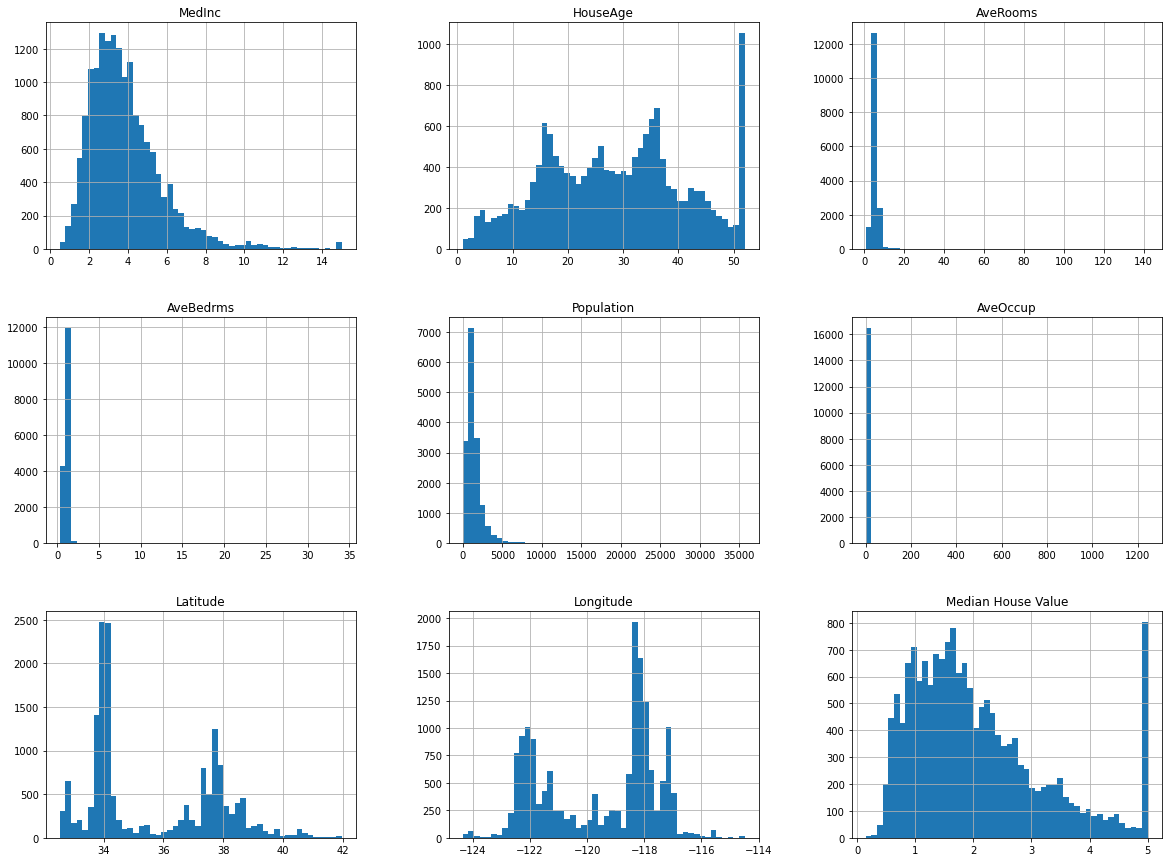

In [251]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## ***Step 3:*** Seperate the data into train dataframe and the values that the model will predict.

Select the columns MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude to be our train data.

In [252]:
selected_columns = df[["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]]

X_df = selected_columns.copy().dropna()

#Convert the X_df into numpy array 
X = X_df.to_numpy()

print(X_df)
# print(X)
# print(X.shape)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      3.9816      27.0  4.928668  ...  4.049798     33.73    -117.93
1      3.4531      23.0  4.021339  ...  1.847682     34.14    -118.13
2      6.3942       4.0  5.681272  ...  2.176425     37.78    -121.95
3      2.2243      32.0  5.685221  ...  2.959693     38.69    -121.45
4      3.0217       9.0  5.006324  ...  2.581028     37.69    -121.04
...       ...       ...       ...  ...       ...       ...        ...
16507  5.7214      16.0  6.231429  ...  3.237143     34.12    -117.68
16508  2.7254      41.0  3.834829  ...  1.770197     34.02    -118.47
16509  2.5288      16.0  5.315638  ...  3.533716     36.98    -120.05
16510  2.6165      34.0  4.593168  ...  3.621118     33.89    -118.24
16511  2.5625      30.0  6.504425  ...  3.725664     35.76    -119.14

[16512 rows x 8 columns]


Select the column Median House Value to be the values that our model has to predict.

In [253]:
selected_columns = df[["Median House Value"]]

Y_df = selected_columns.copy().dropna()

Y = Y_df.to_numpy()

print(Y_df)
# print(Y)
# print(Y.shape)

       Median House Value
0                   1.795
1                   2.109
2                   3.567
3                   0.892
4                   1.609
...                   ...
16507               2.594
16508               4.444
16509               0.618
16510               1.009
16511               1.563

[16512 rows x 1 columns]


## ***Step 4:*** Split data into train and test set.

In [254]:
# Split data into training and test sets
x_train, x_test , y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42, shuffle=True)

print("Shape of X_train: ",x_train.shape)
print("Shape of Y_train: ",y_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of X_test: ",y_test.shape)

Shape of X_train:  (13209, 8)
Shape of Y_train:  (13209, 1)
Shape of X_test:  (3303, 8)
Shape of X_test:  (3303, 1)


#### Plot out data before scale them

Text(0, 0.5, '$y$')

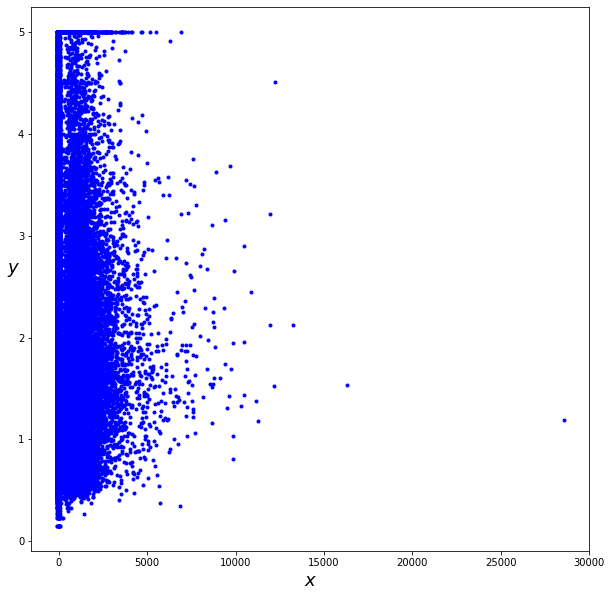

In [255]:
plt.figure(figsize=(10,10)) 
plt.plot(x_train,y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

#### Plot out data after scale them

In [256]:
#Convert our data into numpy arrays after splitting them.
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
Y_train = y_train.to_numpy()
Y_test = y_test.to_numpy()

#Scale our data in order to ensure that all features have a similar scale.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)

(13209, 8)


Text(0, 0.5, '$y$')

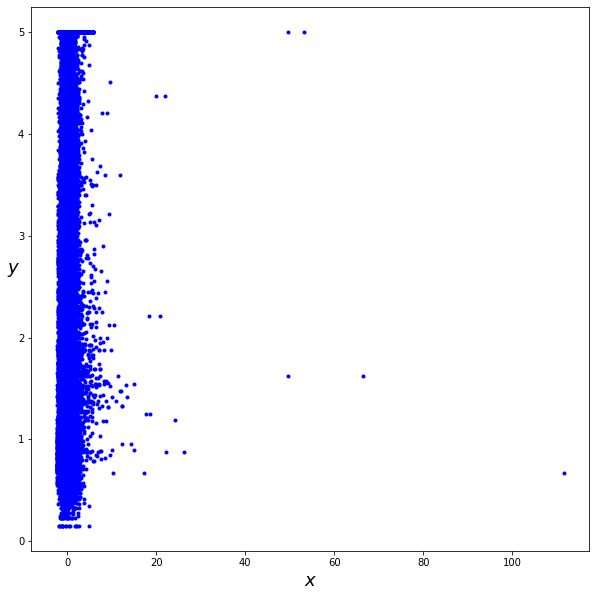

In [257]:
plt.figure(figsize=(10,10))
plt.plot(X_train,Y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [258]:
#Add in first column ones for bias.
X_train =  np.c_[np.ones((len(X_train),1)),X_train]
X_test = np.c_[np.ones((len(X_test),1)),X_test]
print(X_train.shape)

(13209, 9)


## ***Step 5:*** Define the class of Linear Regression

***Main Variables:***
- **n**: features of each vector
- **m**: training examples 
- **X**: train's matrix with shape (m,n)
- **Y**: label's matrix with shape (m,1)
- **W(theta)**: parameter's vector with shape (n,1)
- **cost_history**: cost's vector (iterations,1)

***Functions:***
- __init__(): Initialize the data members of the class
- **calculate_cost()**: Returns Linear Regression's loss
- **fit_Batch_Gradient_Descent()**: Returns the costs of LInear Regression's loss function of each iteration
- **update_weights_Batch_Gradient_Descent()**: Calculates the gradients and update the new value of W(theta).
- **fit_Stochastic_Gradient_Descent()**: Same as above, but now we use batch_size=1.
- **update_weights_Stochastic_Gradient_Descent()**: Same as above
- **fit_Mini_Batch_Gradient_Descent()**: Same as above, but now we use batch_size=20
- **update_weights_Mini_Batch_Gradient_Descent()**: Same as above.
- **predict()**: Returns the hypothetical function h(x)

In [259]:
class LinearRegression(): 
	
  def __init__( self, learning_rate, iterations): 
		
    self.learning_rate = learning_rate		 
    self.iterations = iterations		 

  def calculate_cost(self,X,Y):
    m = X.shape[0]

    predictions = self.predict(X) 

    cost = (1/m)*np.sum(np.square(predictions-Y))

    return cost
		
	# Function for model training			 
  def fit_Batch_Gradient_Descent(self, X, Y) : 
    self.X = X
    #no_of_training_examples, no_of_features		 
    self.m, self.n = self.X.shape 

    # weight random initialization		 
    self.W = np.random.randn(self.n,1) 

    self.Y = Y 

    self.cost_history = np.zeros(self.iterations)

    for i in range( self.iterations ):			 
      self.update_weights_Batch_Gradient_Descent(i)			 
    return self
	
  # Helper function to update weights in gradient descent 
  def update_weights_Batch_Gradient_Descent(self,i):

    #Compute the hypothetical function h(x)
    Y_pred = self.predict(self.X) 
    
    # calculate gradients	 
    dW = (2/self.m)*(np.dot(self.X.T,(Y_pred-self.Y)))
    
    # update weights	 
    self.W = self.W - self.learning_rate * dW	 
    # update the history of costs
    self.cost_history[i]  = self.calculate_cost(self.X,self.Y)

    return self
	
	
  def fit_Stochastic_Gradient_Descent(self, X, Y, batch_size=1):
    self.X = X
    self.m, self.n = self.X.shape 

    self.Y = Y 

    self.W = np.random.randn(self.n,1)*0.01 

    self.cost_history = np.zeros((self.iterations,1))

    for iteration in range(self.iterations):
      cost = 0.0
      for i in range(batch_size):
        random_index = np.random.randint(0,self.m)
        xi = self.X[random_index:random_index+1]
        yi = self.Y[random_index:random_index+1]
        self.update_weights_Stochastic_Gradient_Descent(xi,yi,i,iteration)
        cost += self.calculate_cost(xi,yi)
      self.cost_history[iteration]  = cost
    
    return self

  # Helper function to update weights in gradient descent 
  def update_weights_Stochastic_Gradient_Descent(self,xi,yi,i,iteration):		 
    
    Y_pred = self.predict(xi) 

    dW = (2/xi.shape[0])*(np.dot(xi.T,(Y_pred-yi)))
    self.W = self.W - self.learning_rate * dW

    return self
  
  def fit_Mini_Batch_Gradient_Descent(self, X, Y, batch_size=20):
    self.X = X		 
    self.m, self.n = self.X.shape 

    self.Y = Y 

    self.W = np.random.randn(self.n,1)*0.01  #random initialization

    self.cost_history = np.zeros((self.iterations,1))

    for iteration in range(self.iterations):
      cost = 0.0
      for i in range(batch_size):
        random_index = np.random.randint(0,self.m)
        xi = self.X[random_index:random_index+1]
        yi = self.Y[random_index:random_index+1]
        self.update_weights_Stochastic_Gradient_Descent(xi,yi,i,iteration)
        cost += self.calculate_cost(xi,yi)
      self.cost_history[iteration]  = cost
    
    return self

  # Helper function to update weights in gradient descent 
  def update_weights_Mini_Batch_Gradient_Descent(self,xi,yi,i):		 
    
    Y_pred = self.predict(xi) 

    dW = (2/xi.shape[0])*(np.dot(xi.T,(Y_pred-yi))) 
    self.W = self.W - self.learning_rate * dW

    return self
	
  #Hypothetical function h(x) 
  def predict(self, X):	 
    return np.dot(X,self.W)

## ***Step 6:*** Train model with different gradient descents and display them in plots

In [260]:
model_batch = LinearRegression( iterations = 1000, learning_rate = 0.01) 
model_batch.fit_Batch_Gradient_Descent( X_train, y_train ) 

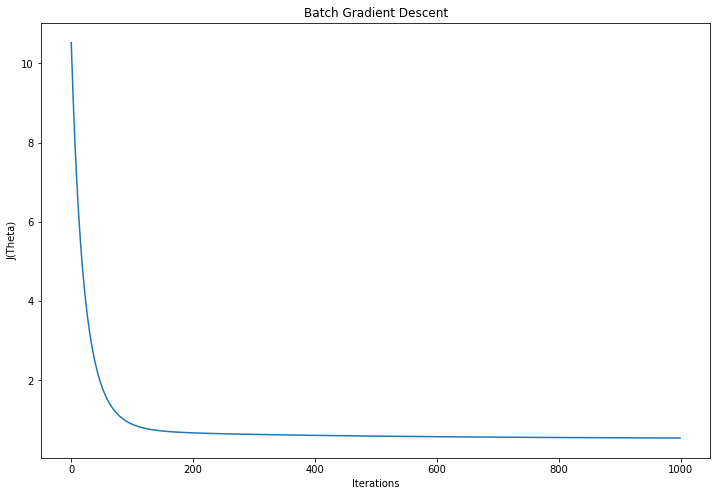

In [261]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_title('Batch Gradient Descent')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
plt.plot(range(model_batch.iterations),model_batch.cost_history,'-')

In [262]:
model_stochastic = LinearRegression(iterations = 1000, learning_rate = 0.001) 
model_stochastic.fit_Stochastic_Gradient_Descent( X_train, y_train ) 

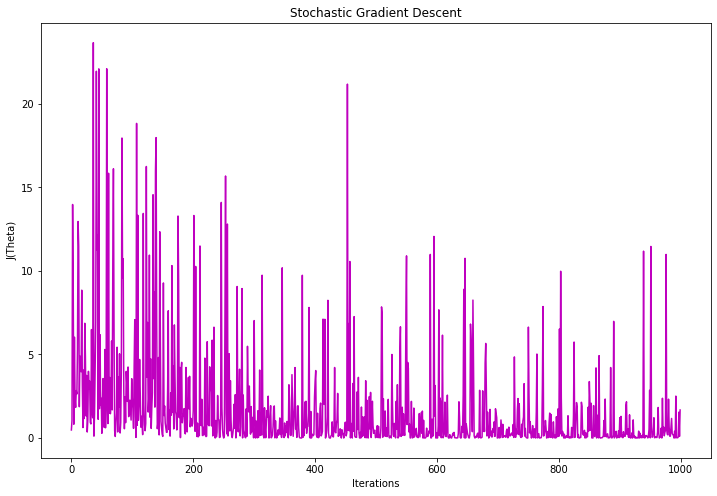

In [263]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_title('Stochastic Gradient Descent')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
plt.plot(range(model_stochastic.iterations),model_stochastic.cost_history,'-m')

In [264]:
model_mini_batch = LinearRegression( iterations = 1000, learning_rate = 0.0001) 
model_mini_batch.fit_Mini_Batch_Gradient_Descent( X_train, y_train ) 

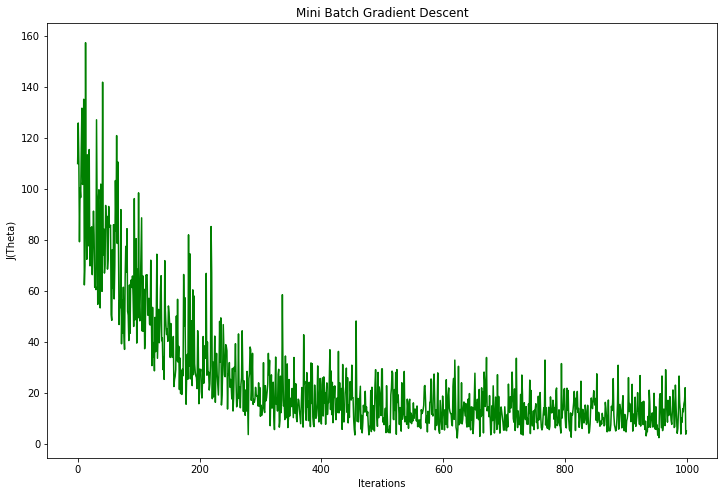

In [265]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_title('Mini Batch Gradient Descent')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
plt.plot(range(model_mini_batch.iterations),model_mini_batch.cost_history,'-g')

## ***Step 8:*** Summaries
- I was inspired from the book of *Hands-on Machine Learning with
Scikit-Learn, Keras, and
TensorFlow (Chapter 4)*, for the code of Simple Batch Gradient Descent. Then, as we said on the lectures, I modified it appropriate so as to implement the Stochastic Gradient Descent (with batch size = 1) and Mini Batch Gradient Descent (with batch size = 20).
- ***In Batch Gradient Descent***, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch. The graph of cost vs epochs is also quite smooth because we are averaging over all the gradients of training data for a single step. We observe that the cost keeps on decreasing over the epochs.
- In ***Stochastic Gradient Descent***, we consider just one example at a time to take a single step. Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations. Also because the cost is so fluctuating, it will never reach the minima but it will keep dancing around it.
- In ***Mini Batch Gradient Descent***, we use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. Just like SGD, the average cost over the epochs in mini-batch gradient descent fluctuates because we are averaging a small number of examples at a time. So, when we are using the mini-batch gradient descent we are updating our parameters frequently as well as we can use vectorized implementation for faster computations.
- I experimented with many values of Learning rates and iterations and I think that I picked the best of them.
- In general we notice that as the iterations increase the cost decreases, which is good because the algorithm converges.